In [52]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.layers import GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [26]:
batch_size=64
num_classes=10
epochs=100

In [27]:
(x_train,y_train),(x_test,y_test)= cifar10.load_data()

In [28]:
x_train.shape

(50000, 32, 32, 3)

In [29]:
y_train.shape

(50000, 1)

In [30]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [31]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [32]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [33]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

datagen.fit(x_train)


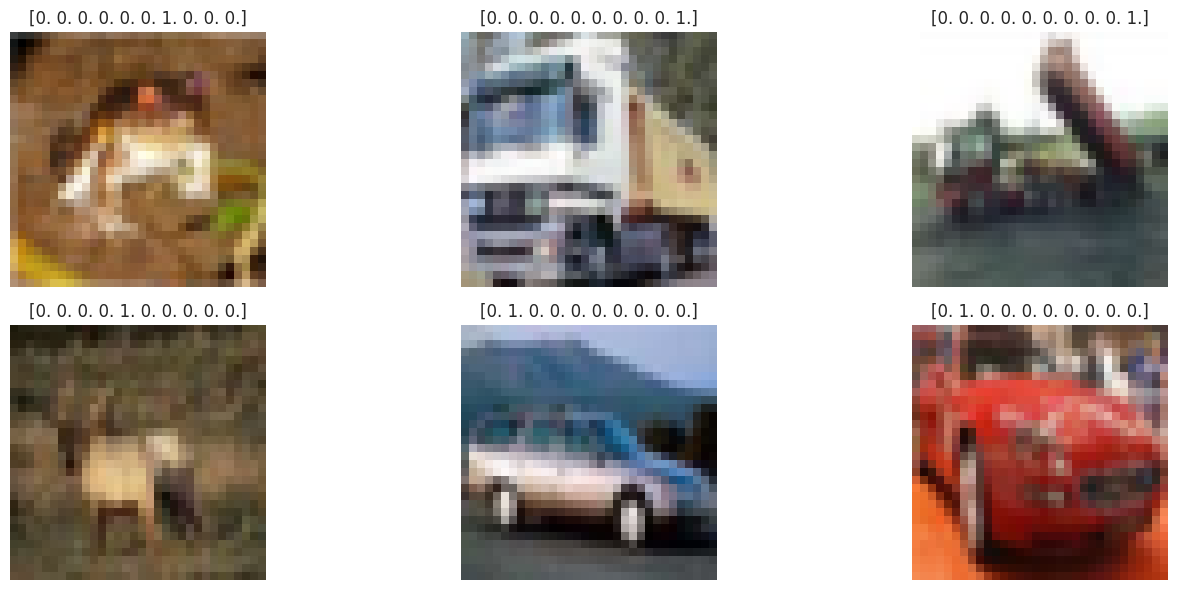

In [56]:
fig, axes = plt.subplots(2,3, figsize=(15,6))
axes = axes.flatten()
for i in range(6):
    axes[i].imshow(x_train[i])
    axes[i].axis('off')
    axes[i].set_title(y_train[i])
plt.tight_layout()
plt.show()

In [ ]:
x_train= x_train.astype('float32')
x_test= x_test.astype('float32')
x_train /= 255
x_test /= 255

In [35]:
model = Sequential()

# Block 1
model.add(Conv2D(64,(3,3),padding='same',activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(32,32,3)))
model.add(BatchNormalization())

model.add(Conv2D(64,(3,3),padding='same',activation='relu',
                 kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.3))

# Block 2
model.add(Conv2D(128,(3,3),padding='same',activation='relu',
                 kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',activation='relu',
                 kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.4))

# Block 3
model.add(Conv2D(256,(3,3),padding='same',activation='relu',
                 kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.4))

# Classifier
model.add(GlobalAveragePooling2D())
model.add(Dense(256,activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 627,274 (2.39 MB)

 Trainable params: 625,482 (2.39 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [36]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [37]:
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.5,
                              patience=5,
                              min_lr=1e-6)


In [38]:
history = model.fit(
    datagen.flow(x_train,y_train,batch_size=batch_size),
    epochs=epochs,
    validation_data=(x_test,y_test),
    callbacks=[early_stop,reduce_lr]
)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 59ms/step - accuracy: 0.3033 - loss: 2.1128 - val_accuracy: 0.4516 - val_loss: 1.6596 - learning_rate: 0.0010
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.5172 - loss: 1.3349 - val_accuracy: 0.5763 - val_loss: 1.2050 - learning_rate: 0.0010
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.5996 - loss: 1.1184 - val_accuracy: 0.5651 - val_loss: 1.2350 - learning_rate: 0.0010
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.6527 - loss: 0.9858 - val_accuracy: 0.6838 - val_loss: 0.9139 - learning_rate: 0.0010
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.6821 - loss: 0.9089 - val_accuracy: 0.7054 - val_loss: 0.8534 - learning_rate: 0.0010
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.7046 - loss: 0.8414 - val_accuracy: 0.7074 - val_loss: 0.8524 - learning_rate: 0.0010
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 48ms/step - accuracy: 0.7259 - loss: 

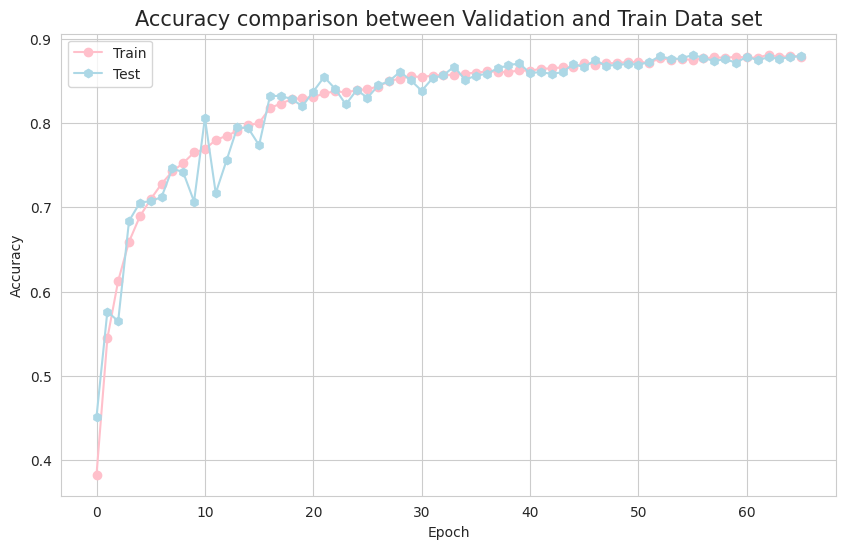

In [39]:
import seaborn as sb
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(history.history['accuracy'],color="pink",marker='o')
plt.plot(history.history['val_accuracy'],color='lightblue',marker='h')
plt.title('Accuracy comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

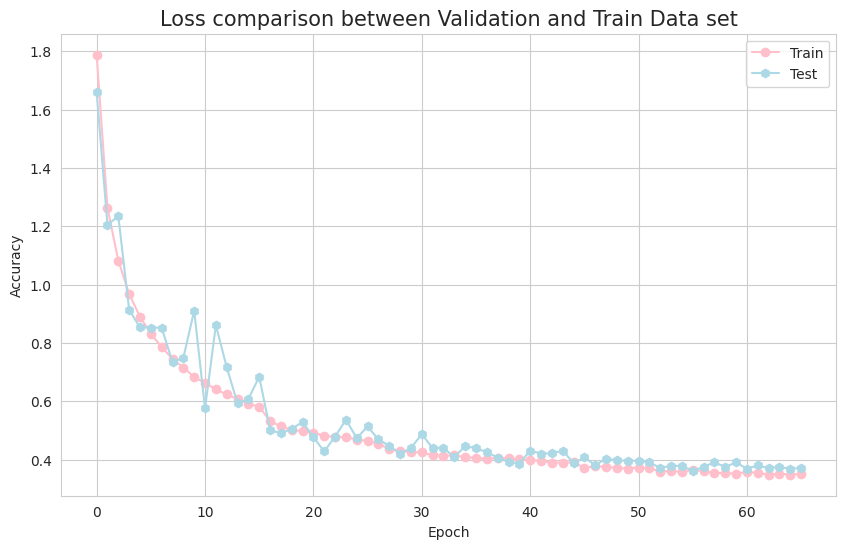

In [40]:
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(history.history['loss'],color="pink",marker='o')
plt.plot(history.history['val_loss'],color='lightblue',marker='h')
plt.title('Loss comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step


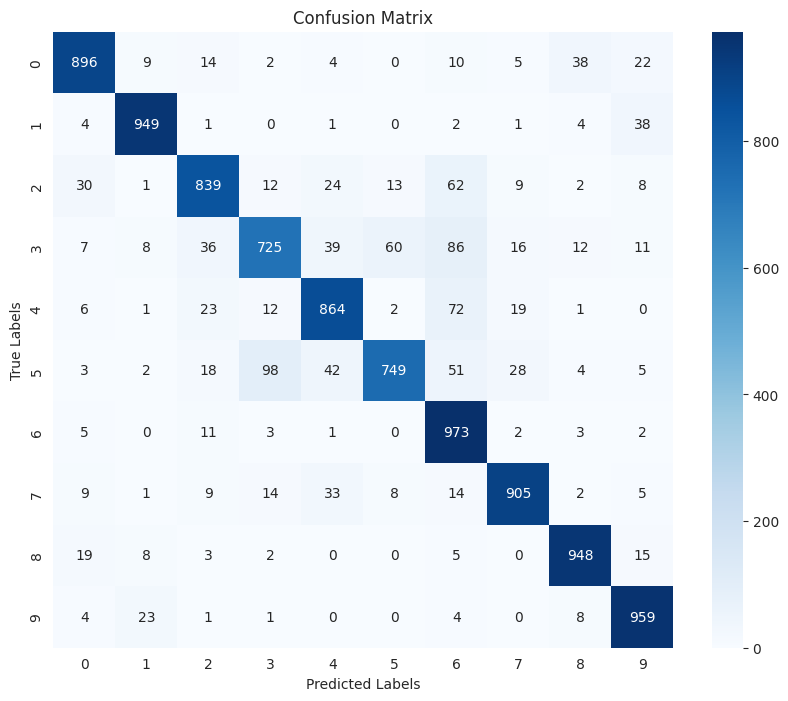

In [43]:
y_pred = model.predict(x_test)
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [44]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))

# Print the classification report
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1000
           1       0.95      0.95      0.95      1000
           2       0.88      0.84      0.86      1000
           3       0.83      0.72      0.78      1000
           4       0.86      0.86      0.86      1000
           5       0.90      0.75      0.82      1000
           6       0.76      0.97      0.85      1000
           7       0.92      0.91      0.91      1000
           8       0.93      0.95      0.94      1000
           9       0.90      0.96      0.93      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [42]:
test_loss, test_acc = model.evaluate(x_test,y_test)
print("Final Test Accuracy:",test_acc*100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8822 - loss: 0.3635
Final Test Accuracy: 88.06999921798706


In [45]:
import random

def predict():
    # Randomly select an index from the test set
    idx = random.randint(0, len(x_test) - 1)

    # Select the image and its corresponding label
    image = x_test[idx]
    actual_label = y_test[idx]

    # Make predictions using the trained model
    predictions = model.predict(np.expand_dims(image, axis=0))
    predicted_label = np.argmax(predictions)

    # Define class names (assuming num_classes is defined)
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                  'dog', 'frog', 'horse', 'ship', 'truck']


    # Display the image
    plt.figure(figsize=(1,1))
    plt.imshow(image)
    plt.axis('off')
    plt.title(f'Actual: {class_names[np.argmax(actual_label)]}, Predicted: {class_names[predicted_label]}')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


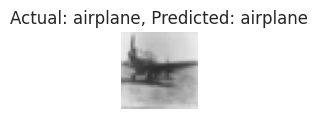

In [48]:
predict()